In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [3]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])
color4 = np.array([0.5, 0.5, 0.5])

In [5]:
log = lammps_logfile.File("gcmc.log")
timestep = 1

time, vol, dens, temp = [], [], [], []
time = log.get("Step")*timestep/1000 # ps
n0 = log.get("v_nO")

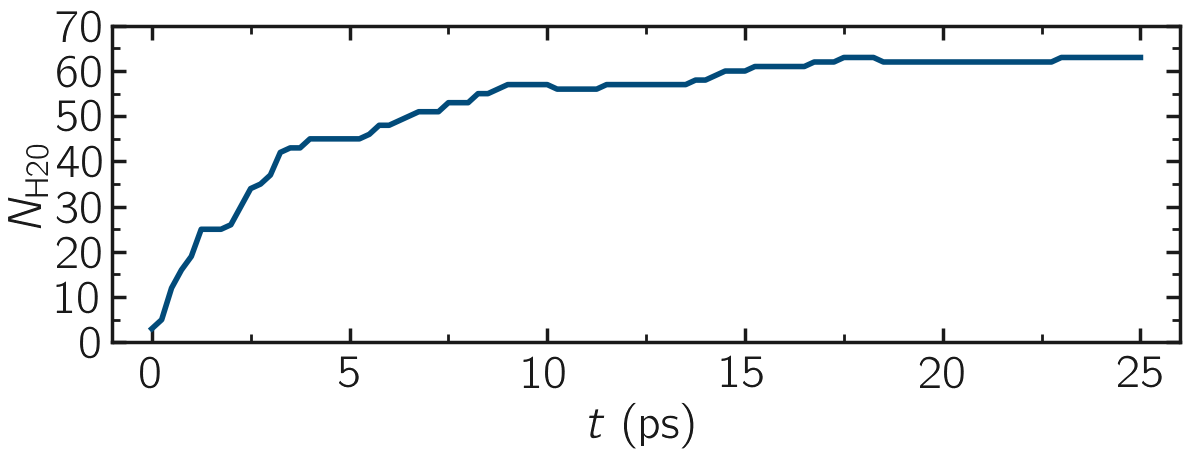

In [15]:
filename = "GCMC-number"

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,8), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=1, n_line=2)

# Panel a
myplt.add_panel()
myplt.add_plot(x = time, y = n0, type = "plot", linewidth_data = 3,
            marker = "-", data_color = color2, markersize = 12)
myplt.complete_panel(ylabel = r'$N_\mathrm{H20}$',
                     xlabel = r'$t ~ \mathrm{(ps)}$', xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 25.1, 5), y_ticks=np.arange(0, 71, 10),
                    x_boundaries=(-1, 26), y_boundaries=(0, 70))
# Print figure
# myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)